In [1]:
import os
os.environ['PATH'] += os.pathsep + 'C:\\Program Files\\Graphviz\\bin' # replace with the actua path to the graphviz bin folder

In [2]:
pip install pydotplus

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus  

import warnings
warnings.filterwarnings('ignore')

In [4]:
input_file = r'D:\certisured ML\Machine Learning\multilinear regression\PastHires.csv'
df = pd.read_csv(input_file)

In [5]:
df

,Years Experience,Employed?,Previous employers,Level of Education,Top-tier school,Interned,Hired
0,10,Y,4,BS,N,N,Y
1,0,N,0,BS,Y,Y,Y
2,7,N,6,BS,N,N,N
3,2,Y,1,MS,Y,N,Y
4,20,N,2,PhD,Y,N,N
5,0,N,0,PhD,Y,Y,Y
6,5,Y,2,MS,N,Y,Y
7,3,N,1,BS,N,Y,Y
8,15,Y,5,BS,N,N,Y
9,0,N,0,BS,N,N,N


In [6]:
df.head()

,Years Experience,Employed?,Previous employers,Level of Education,Top-tier school,Interned,Hired
0,10,Y,4,BS,N,N,Y
1,0,N,0,BS,Y,Y,Y
2,7,N,6,BS,N,N,N
3,2,Y,1,MS,Y,N,Y
4,20,N,2,PhD,Y,N,N


In [7]:
df.tail()

,Years Experience,Employed?,Previous employers,Level of Education,Top-tier school,Interned,Hired
8,15,Y,5,BS,N,N,Y
9,0,N,0,BS,N,N,N
10,1,N,1,PhD,Y,N,N
11,4,Y,1,BS,N,Y,Y
12,0,N,0,PhD,Y,N,Y


In [8]:
df.columns

Index(['Years Experience', 'Employed?', 'Previous employers',
       'Level of Education', 'Top-tier school', 'Interned', 'Hired'],
      dtype='object')

In [9]:
df.shape

(13, 7)

In [10]:
df.dtypes

Years Experience       int64
Employed?             object
Previous employers     int64
Level of Education    object
Top-tier school       object
Interned              object
Hired                 object
dtype: object

In [11]:
df.isnull().sum()

Years Experience      0
Employed?             0
Previous employers    0
Level of Education    0
Top-tier school       0
Interned              0
Hired                 0
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Years Experience    13 non-null     int64 
 1   Employed?           13 non-null     object
 2   Previous employers  13 non-null     int64 
 3   Level of Education  13 non-null     object
 4   Top-tier school     13 non-null     object
 5   Interned            13 non-null     object
 6   Hired               13 non-null     object
dtypes: int64(2), object(5)
memory usage: 860.0+ bytes


In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Years Experience,13.0,5.153846,6.348834,0.0,0.0,3.0,7.0,20.0
Previous employers,13.0,1.769231,2.006400,0.0,0.0,1.0,2.0,6.0


In [14]:
df.describe(include=object).T

,count,unique,top,freq
Employed?,13,2,N,8
Level of Education,13,3,BS,7
Top-tier school,13,2,N,7
Interned,13,2,N,8
Hired,13,2,Y,9


In [15]:
df.columns

Index(['Years Experience', 'Employed?', 'Previous employers',
       'Level of Education', 'Top-tier school', 'Interned', 'Hired'],
      dtype='object')

In [16]:
df.head()

,Years Experience,Employed?,Previous employers,Level of Education,Top-tier school,Interned,Hired
0,10,Y,4,BS,N,N,Y
1,0,N,0,BS,Y,Y,Y
2,7,N,6,BS,N,N,N
3,2,Y,1,MS,Y,N,Y
4,20,N,2,PhD,Y,N,N


In [17]:
df['Level of Education'].unique()

array(['BS', 'MS', 'PhD'], dtype=object)

In [18]:
df.groupby('Years Experience')['Level of Education'].unique()

Years Experience
0     [BS, PhD]
1         [PhD]
2          [MS]
3          [BS]
4          [BS]
5          [MS]
7          [BS]
10         [BS]
15         [BS]
20        [PhD]
Name: Level of Education, dtype: object

In [19]:
for i in df.columns:
    print(df[i].unique())

[10  0  7  2 20  5  3 15  1  4]
['Y' 'N']
[4 0 6 1 2 5]
['BS' 'MS' 'PhD']
['N' 'Y']
['N' 'Y']
['Y' 'N']


In [20]:
d = {'Y': 1,'N':0}
df['Employed?'] = df['Employed?'].map(d)
df['Top-tier school'] = df['Top-tier school'].map(d)
df['Interned'] = df['Interned'].map(d)
d = {'BS': 0, 'MS':1,'Phd':2}
df['Level of Education'] = df['Level of Education'].map(d)
df

,Years Experience,Employed?,Previous employers,Level of Education,Top-tier school,Interned,Hired
0,10,1,4,0.0,0,0,Y
1,0,0,0,0.0,1,1,Y
2,7,0,6,0.0,0,0,N
3,2,1,1,1.0,1,0,Y
4,20,0,2,NaN,1,0,N
5,0,0,0,NaN,1,1,Y
6,5,1,2,1.0,0,1,Y
7,3,0,1,0.0,0,1,Y
8,15,1,5,0.0,0,0,Y
9,0,0,0,0.0,0,0,N


In [21]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Years Experience,13.0,5.153846,6.348834,0.0,0.0,3.0,7.0,20.0
Employed?,13.0,0.384615,0.506370,0.0,0.0,0.0,1.0,1.0
Previous employers,13.0,1.769231,2.006400,0.0,0.0,1.0,2.0,6.0
Level of Education,9.0,0.222222,0.440959,0.0,0.0,0.0,0.0,1.0
Top-tier school,13.0,0.461538,0.518875,0.0,0.0,0.0,1.0,1.0
Interned,13.0,0.384615,0.506370,0.0,0.0,0.0,1.0,1.0


In [22]:
num = df.select_dtypes(exclude=['object']).columns.tolist()
print(num)

['Years Experience', 'Employed?', 'Previous employers', 'Level of Education', 'Top-tier school', 'Interned']


Years Experience


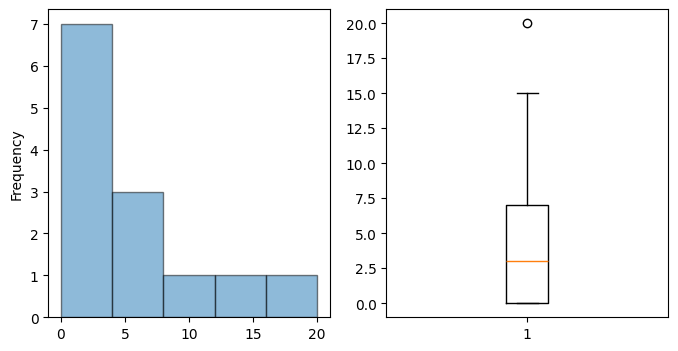

Employed?


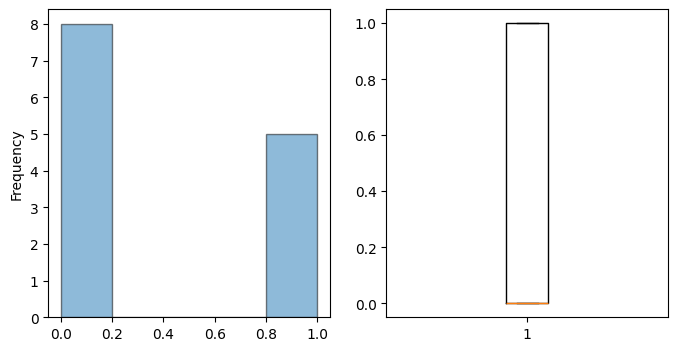

Previous employers


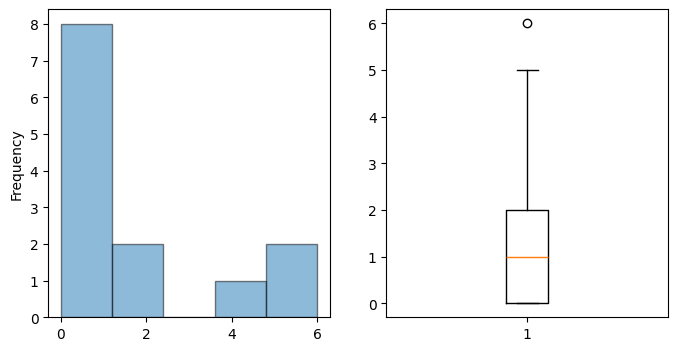

Level of Education


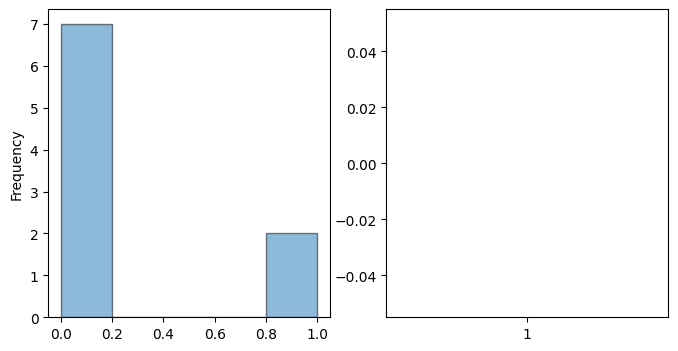

Top-tier school


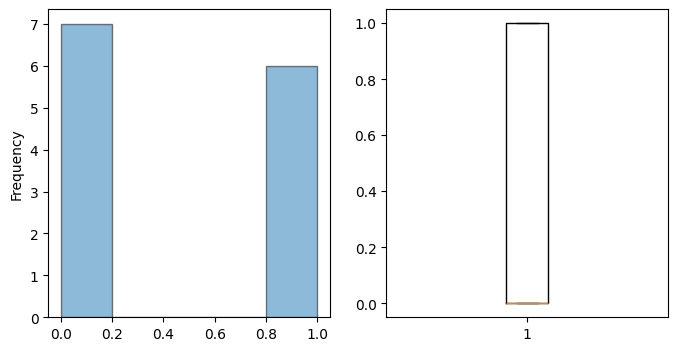

Interned


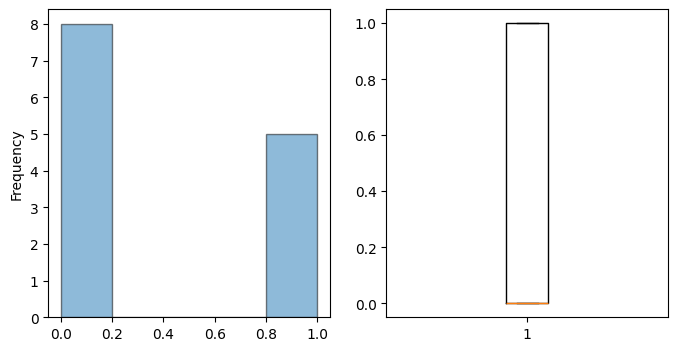

In [23]:
for col in num:
    print(col)

    plt.figure(figsize=(8,4))
    plt.subplot(1,2,1)
    df[col].hist(bins=5,alpha=0.5,grid=False,edgecolor='black')
    plt.ylabel('Frequency')

    plt.subplot(1,2,2)
    plt.boxplot(df[col])
    plt.show()


,Years Experience,Employed?,Previous employers,Level of Education,Top-tier school,Interned
Years Experience,1.000000,0.265195,0.644131,-0.186020,-0.200427,-0.356917
Employed?,0.265195,1.000000,0.340709,0.478091,-0.414758,0.025000
Previous employers,0.644131,0.340709,1.000000,-0.184143,-0.529534,-0.397494
Level of Education,-0.186020,0.478091,-0.184143,1.000000,0.357143,0.059761
Top-tier school,-0.200427,-0.414758,-0.529534,0.357143,1.000000,-0.097590
Interned,-0.356917,0.025000,-0.397494,0.059761,-0.097590,1.000000


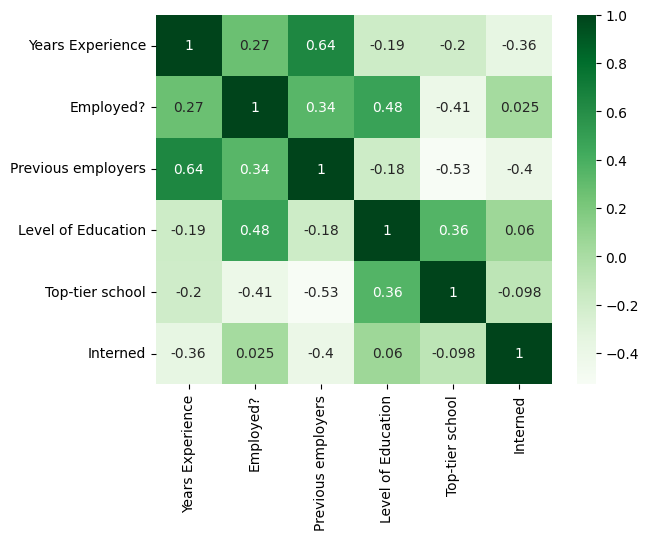

In [24]:
corr = df[num].corr(method='pearson')
sns.heatmap(corr,annot=True,cmap='Greens')
corr

In [25]:
df.columns

Index(['Years Experience', 'Employed?', 'Previous employers',
       'Level of Education', 'Top-tier school', 'Interned', 'Hired'],
      dtype='object')

In [26]:
features = list(df.columns[:6])
features

['Years Experience',
 'Employed?',
 'Previous employers',
 'Level of Education',
 'Top-tier school',
 'Interned']

In [27]:
y = df['Hired']
X = df[features]

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [29]:
model = DecisionTreeClassifier(criterion='gini')
model.fit(X_train,y_train)
model

DecisionTreeClassifier()

In [30]:
y_train

8     Y
5     Y
2     N
1     Y
12    Y
4     N
7     Y
10    N
3     Y
6     Y
Name: Hired, dtype: object

In [31]:
import math

# Function to calculate entropy
def entropy(column):
    counts = column.value_counts()
    probabilities = counts / len(column)
    return -sum(probabilities * probabilities.apply(math.log2))

# Function to calculate conditional entropy
def conditional_entropy(data, feature, target):
    feature_values = data[feature].unique()
    weighted_entropy = 0
    for value in feature_values:
        subset = data[data[feature] == value]
        weighted_entropy += (len(subset) / len(data)) * entropy(subset[target])
    return weighted_entropy

# Function to calculate information gain
def information_gain(data, feature, target):
    total_entropy = entropy(data[target])
    feature_conditional_entropy = conditional_entropy(data, feature, target)
    return total_entropy - feature_conditional_entropy

# Calculate information gain for each feature
for feature in features:
    ig = information_gain(df, feature, 'Hired')
    print(f"Information Gain for {feature}: {ig}")

Information Gain for Years Experience: 0.6408676019243735
Information Gain for Employed?: 0.2751070248348759
Information Gain for Previous employers: 0.23739740978310186
Information Gain for Level of Education: 0.42573441099130543
Information Gain for Top-tier school: 0.0019055645046179848
Information Gain for Interned: 0.2751070248348759


In [32]:
dot_data = export_graphviz(model,out_file=None,
                           feature_names=X_train.columns,
                           rounded=True,proportion=False,
                           precision=2,filled=True)
graph = pydotplus.graph_from_dot_data(dot_data)

Image(graph.create_png())

InvocationException: GraphViz's executables not found

In [ ]:
y_pred = model.predict(X_test)
y_pred

array(['Y', 'Y', 'Y'], dtype=object)

In [ ]:
#evaluate the model
accuracy = accuracy_score(y_test,y_pred)
classification_rep = classification_report(y_test,y_pred)
conf_matrix = confusion_matrix(y_test,y_pred)
# print the result
print('accuracy',accuracy)
print('classification_report :\n',classification_rep)
print('confusion matrix',conf_matrix)


accuracy 0.6666666666666666
classification_report :
               precision    recall  f1-score   support

           N       0.00      0.00      0.00         1
           Y       0.67      1.00      0.80         2

    accuracy                           0.67         3
   macro avg       0.33      0.50      0.40         3
weighted avg       0.44      0.67      0.53         3

confusion matrix [[0 1]
 [0 2]]


In [ ]:
X_train

,Years Experience,Employed?,Previous employers,Level of Education,Top-tier school,Interned
8,15,1,5,0.0,0,0
5,0,0,0,NaN,1,1
2,7,0,6,0.0,0,0
1,0,0,0,0.0,1,1
12,0,0,0,NaN,1,0
4,20,0,2,NaN,1,0
7,3,0,1,0.0,0,1
10,1,0,1,NaN,1,0
3,2,1,1,1.0,1,0
6,5,1,2,1.0,0,1


In [ ]:
new = [[30,1,5,2,1,1]]
y_pred = model.predict(new)
y_pred[0]

'Y'

In [ ]:
new = [[25,0,1,2,1,1]]
y_pred = model.predict(new)
y_pred[0]

'Y'